# Расчет показателей надежности RAID-массива

## Принципы работы RAID-массивов

**RAID** (англ. redundant array of independent disks — избыточный массив независимых дисков) — массив из нескольких дисков (запоминающих устройств), управляемых контроллером, связанных между собой скоростными каналами передачи данных и воспринимаемых внешней системой как единое целое. В зависимости от типа используемого массива может обеспечивать различные степени отказоустойчивости и быстродействия. Служит для повышения надёжности хранения данных и/или для повышения скорости чтения/записи.

Существует несколько схем для организации дискового массива. В данном примере будут рассмотрены два уровня спецификации RAID:
 - RAID 0 — дисковый массив повышенной производительности с чередованием, без отказоустойчивости;
 - RAID 1 — зеркальный дисковый массив.
 
**RAID 0 (striping — «чередование»)** — дисковый массив из двух или более жёстких дисков без резервирования. Информация разбивается на блоки данных (A_i) фиксированной длины и записывается на оба/несколько дисков одновременно. При выходе любого диска из строя данные полностью разрушаются.

![RAID 0](https://upload.wikimedia.org/wikipedia/commons/9/9b/RAID_0.svg 'RAID 0')

**RAID 1 (mirroring — «зеркалирование»)** — массив из двух дисков, являющихся полными копиями друг друга. Информация разбивается на блоки данных, которые записываются на оба диска. За счет параллельной работы при чтении блоков увеличивается скорость считывания. Имеет высокую надёжность — работает до тех пор, пока функционирует хотя бы один диск в массиве. Вероятность выхода из строя сразу двух дисков равна произведению вероятностей отказа каждого диска, т.е. значительно ниже вероятности выхода из строя отдельного диска.

![RAID 1](https://upload.wikimedia.org/wikipedia/commons/b/b7/RAID_1.svg 'RAID 1')

Сравнительные характеристики массивов RAID уровней 0 и 1 приведены в таблице


Показатель                | RAID 0                                    | RAID 1
:-------------------------|:------------------------------------------|:----------------------
Объем массива             |Сумма объемов накопителей                  | Объем одного накопителя
Скорость чтения           |Пропорциональна числу накопителей          | Пропорциональна числу накопителей
Скорость записи           |Пропорциональна числу накопителей          | Соответствует скорости одного накопителя
Надежность                |Снижается пропорционально числу накопителей| Растет пропорционально числу накопителей
Стоимость хранения на 1 Мб|Постоянна                                  | Растет пропорционально числу накопителей


## Условие задачи

Производитель жестких дисков заявляет в спецификации величину средней наработки до отказа $MTTF = 10^5$ часов.
Системному администратору необходимо оценить надежность дисковых массивов RAID 0 и RAID 1, составленных из 4 жестких дисков данной модели.
Требуется для каждого варианта массива:
1. Построить блок-схему надежности
2. Получить зависимость вероятности безотказной (ВБР) работы системы $P_s(t)$ и рассчитать ВБР при наработке, соответствующей средней наработке до отказа индивидуального накопителя MTTF.
3. Построить графики плотности и интенсивности отказов
4. Определить среднюю наработку до отказа системы: $T_s$

Распределение наработки диска до отказа считать экспоненциальным. Отказы накопителей считать случайными независимыми событиями.


In [17]:
# Подключение библиотек
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

## Решение - RAID 0

### Блок-схема надежности
В режиме RAID 0 емкости дисков объединяются, а данные равномерно распределяются между всеми дисками. Для отказа массива достаточно отказа любого диска, поэтому все элементы на блок-схеме надежности должны быть соединены последовательно


![RAID0 БСН](raid0.svg 'Блок-схема надежности для массива RAID 0')

По условию, наработка до отказа отдельного диска подчиняется экспоненциальному закону распределения: $$p_1(t) = e^{-\lambda_1 t}, $$ где $\lambda_1$ - интенсивность отказов отдельного диска.

Для экспоненциального распределения наработки интенсивность отказов - константа: $$\lambda_1 = \frac{1}{T_1}, $$ где $T_1$ - средняя наработка до отказа отдельного диска ($MTTF$).

In [18]:
T_1 = 1e5 #MTTF диска
lambda_1 = 1/T_1
print('Интенсивность отказов отдельного диска: %g' %(lambda_1))

Интенсивность отказов отдельного диска: 1e-05


### Вероятность безотказной работы системы
При последовательном соединении элементов для работоспособности системы необходима работоспособность всех ее элементов. Поэтому ВБР системы - произведение ВБР всех элементов: $$P_s(t) = \prod_i p_i(t) = {\left(e^{-\lambda_1 t} \right)}^4 = e^{-4\lambda_1 t}$$

In [19]:
# Функция для расчета ВБР отдельного диска

def p_1(t):
    return np.exp(-lambda_1 * t)

# Функция для расчета ВБР дискового массива

def P_s0(t):
    return np.exp(-4 * lambda_1 * t)

print('При t = MTTF ВБР элемента: %.2f, ВБР системы: %.2f' % (p_1(T_1), P_s0(T_1)))

При t = MTTF ВБР элемента: 0.37, ВБР системы: 0.02


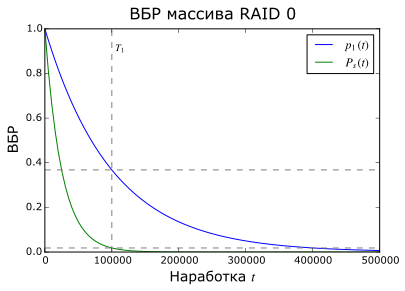

In [4]:
# График ВБР для отдельного диска и дискового массива
t = np.linspace(0, 5 * T_1, 100)
plt.plot(t, p_1(t), label=r'$p_1(t)$') #ВБР диска
plt.plot(t, P_s0(t), label=r'$P_s(t)$') #ВБР массива

# Опорные линии для ВБР при средней наработке до отказа диска
plt.axvline(T_1, linestyle='--', color='gray') 
plt.text(T_1*1.05, 0.9, '$T_1$')
plt.axhline(p_1(T_1), linestyle='--', color='gray')
plt.axhline(P_s0(T_1), linestyle='--', color='gray')

plt.xlabel('Наработка $t$', fontsize=14)
plt.ylabel('ВБР', fontsize=14)
plt.legend(loc='best')
plt.title('ВБР массива RAID 0', y=1.02, fontsize=16);

При последовательном соединении ВБР системы меньше ВБР элемента.

### Плотность и интенсивность отказов

Плотность распределения отказов (ПРО) по определению есть: $$f(t) = \frac{\mathrm dF(t)}{\mathrm dt} = \frac{\mathrm d(1-P(t))}{\mathrm dt} = - \frac{\mathrm dP(t)}{\mathrm dt}$$

В данном случае плотность несложно найти аналитически:

$$f_1(t) = -\left( e^{-\lambda_1 t} \right)' = \lambda_1 e^{-\lambda_1 t}$$

$$f_s(t) = -\left( e^{-4\lambda_1 t} \right)' = 4 \lambda_1 e^{-4\lambda_1 t}$$

Сравнивая выражения для ВБР элемента и системы, можно заметить, что при последовательном соединении элементов с экспоненциальной наработкой до отказа сохраняется экспоненциальный закон распределения наработки для системы:

\begin{align}
p_1(t) & = e^{-\lambda_1 t} \\
P_s(t) & = e^{-4\lambda_1 t}\\
\end{align}

При этом интенсивность отказов для системы увеличивается пропорционально числу последовательно соединенных элементов: $$\Lambda_s = 4\lambda_1$$

In [5]:
#Плотность распределения отказов для диска:
def f_1(t):
    return lambda_1 * np.exp(-lambda_1 * t)

#Плотность распределения отказов для массива:
def f_s0(t):
    return 4*lambda_1 * np.exp(-4 * lambda_1 * t)


#Интенсивность отказов массива:
lambda_s0 = 4 * lambda_1

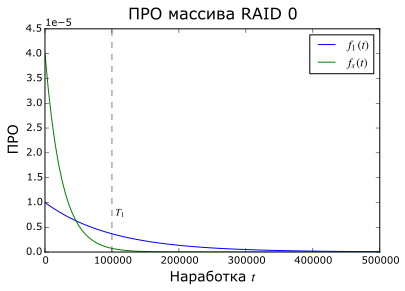

In [6]:
# График плотности распределения отказов для отдельного диска и дискового массива
t = np.linspace(0, 5 * T_1, 100)
plt.plot(t, f_1(t), label=r'$f_1(t)$') #ПРО диска
plt.plot(t, f_s0(t), label=r'$f_s(t)$') #ПРО массива

# Опорные линии для ВБР при средней наработке до отказа диска
plt.axvline(T_1, linestyle='--', color='gray') 
plt.text(T_1*1.05, 2*f_1(T_1), '$T_1$')

plt.xlabel('Наработка $t$', fontsize=14)
plt.ylabel('ПРО', fontsize=14)
plt.legend(loc='best')
plt.ticklabel_format(style='scientific', axis='y', scilimits=(0, 0))
plt.title('ПРО массива RAID 0', y=1.02, fontsize=16);

При последовательном соединении плотность распределения отказов для системы более сконцентрирована в области малых наработок, чем плотность распределения отказов для отдельного элемента.

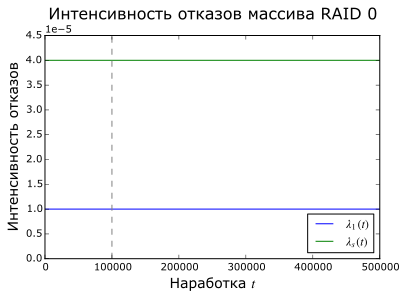

In [7]:
# График интенсивности  отказов для отдельного диска и дискового массива
t = np.linspace(0, 5 * T_1, 100)

o = np.ones(len(t)) 
#вспомогательный массив, функция plot не может построить график, если размерности массивов абсцисс и ординат не совпадают


plt.plot(t, o * lambda_1, label=r'$\lambda_1(t)$') #интенсивность отказов диска
plt.plot(t, o * lambda_s0, label=r'$\lambda_s(t)$') #интенсивность отказов массива

# Опорные линии для ВБР при средней наработке до отказа диска
plt.axvline(T_1, linestyle='--', color='gray') 
#plt.text(T_1*1.05, 2*f_1(T_1), '$T_1$')

plt.xlabel('Наработка $t$', fontsize=14)
plt.ylabel('Интенсивность отказов', fontsize=14)
plt.legend(loc='best')
plt.ticklabel_format(style='scientific', axis='y', scilimits=(0, 0))
plt.ylim(ymin=0)
plt.title('Интенсивность отказов массива RAID 0', y=1.05, fontsize=16);


При последовательном соединении элементов с экспоненциальной наработкой получается также экспоненциальное распределение наработки до отказа. Интенсивность отказов для системы - константа. Ее значение растет пропорционально числу последовательно соединенных элементов. В данном случае интенсивность отказов системы в 4 раза выше интенсивности отказов отдельного элемента.

###Средняя наработка до отказа

Для экспоненциального распределения наработки: $$ T = \frac{1}{\lambda}. $$

В данном случае средняя наработка системы до отказа составит: $$ T_s = \frac{1}{4 \lambda_1} = \frac{1}{4} T_1$$

In [8]:
T_s0 = 1/4 * T_1
print('Средняя наработка до отказа диска: %.0f часов, массива: %.0f часов' % (T_1, T_s0))

Средняя наработка до отказа диска: 100000 часов, массива: 25000 часов


## Решение - RAID 1

### Блок-схема надежности
В режиме RAID 1 данные копируются на все диски массива, поэтому массив может отказать только когда откажут все диски. 
Все элементы на блок-схеме надежности должны быть соединены параллельно.


![RAID1 БСН](raid1.svg 'Блок-схема надежности для массива RAID 1')

Для отказа системы необходим отказ всех 4 дисков, поэтому вероятность отказа системы:

$$Q_s(t) = \prod_i q_i(t) = \left( 1 - p_1(t) \right)^4 = \left( 1 - e^{-\lambda_1 t} \right)^4 $$

Следовательно, ВБР системы:
$$ P_s(t) = 1 - Q_s(t) = 1 - \left( 1 - e^{-\lambda_1 t} \right)^4 $$


In [9]:
#ВБР массива RAID 1
def P_s1(t):
    return 1 - (1 - np.exp(-lambda_1 * t))**4

print('При t = MTTF ВБР элемента: %.2f, ВБР системы: %.2f' % (p_1(T_1), P_s1(T_1)))

При t = MTTF ВБР элемента: 0.37, ВБР системы: 0.84


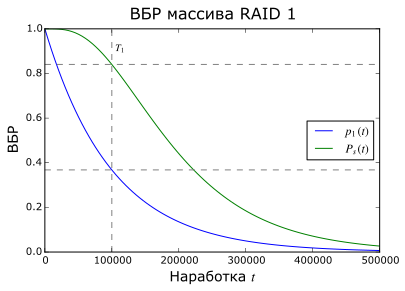

In [10]:
# График ВБР для отдельного диска и дискового массива
t = np.linspace(0, 5 * T_1, 100)
plt.plot(t, p_1(t), label=r'$p_1(t)$') #ВБР диска
plt.plot(t, P_s1(t), label=r'$P_s(t)$') #ВБР массива

# Опорные линии для ВБР при средней наработке до отказа диска
plt.axvline(T_1, linestyle='--', color='gray') 
plt.text(T_1*1.05, 0.9, '$T_1$')
plt.axhline(p_1(T_1), linestyle='--', color='gray')
plt.axhline(P_s1(T_1), linestyle='--', color='gray')

plt.xlabel('Наработка $t$', fontsize=14)
plt.ylabel('ВБР', fontsize=14)
plt.legend(loc='best')
plt.title('ВБР массива RAID 1', y=1.02, fontsize=16);

При параллельном соединении элементов ВБР системы выше ВБР элемента. Вид распределения не сохраняется.

### Плотность и интенсивность отказов

Плотность распределения отказов (ПРО) по определению есть: $$f(t) = - \frac{\mathrm dP(t)}{\mathrm dt}$$

Интенсивность отказов по определению есть: $$\lambda(t) = \frac{f(t)}{P(t)}$$

В данном случае дифференцирование функции ВБР проведем численно, используя функцию [`derivative()`](http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.misc.derivative.html) пакета `SciPy`


In [11]:
from scipy.misc import derivative

#Плотность распределения отказов
def f_s1(t):
    step = 1.0 #шаг для вычисления производной
    return -derivative(P_s1, t, dx=step)

#Интенсивность отказов
def lambda_s1(t):    
    return f_s1(t)/P_s1(t)

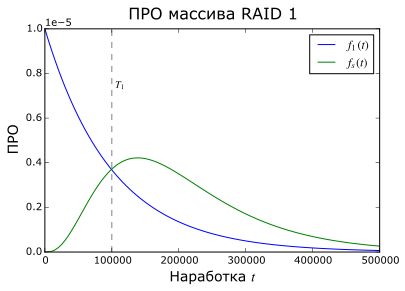

In [12]:
# График плотности распределения отказов для отдельного диска и дискового массива
t = np.linspace(0, 5 * T_1, 100)
plt.plot(t, f_1(t), label=r'$f_1(t)$') #ПРО диска
plt.plot(t, f_s1(t), label=r'$f_s(t)$') #ПРО массива

# Опорные линии для ВБР при средней наработке до отказа диска
plt.axvline(T_1, linestyle='--', color='gray') 
plt.text(T_1*1.05, 2*f_1(T_1), '$T_1$')

plt.xlabel('Наработка $t$', fontsize=14)
plt.ylabel('ПРО', fontsize=14)
plt.legend(loc='best')
plt.ticklabel_format(style='scientific', axis='y', scilimits=(0, 0))
plt.title('ПРО массива RAID 1', y=1.02, fontsize=16);

Плотность распределения отказов для системы с параллельным соединением элементов сконцентрирована в области бОльших наработок, чем в случае с отдельным элементом. Вид распределения не сохраняется.

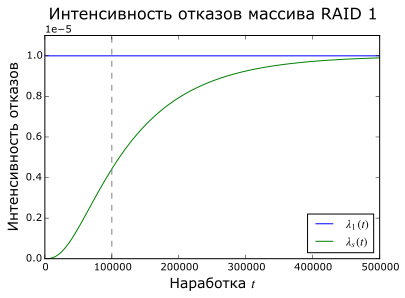

In [13]:
# График интенсивности  отказов для отдельного диска и дискового массива
t = np.linspace(0, 5 * T_1, 100)

o = np.ones(len(t)) 
#вспомогательный массив, функция plot не может построить график, если размерности массивов абсцисс и ординат не совпадают


plt.plot(t, o * lambda_1, label=r'$\lambda_1(t)$') #интенсивность отказов диска
plt.plot(t, lambda_s1(t), label=r'$\lambda_s(t)$') #интенсивность отказов массива

# Опорные линии для ВБР при средней наработке до отказа диска
plt.axvline(T_1, linestyle='--', color='gray') 
#plt.text(T_1*1.05, 2*f_1(T_1), '$T_1$')

plt.xlabel('Наработка $t$', fontsize=14)
plt.ylabel('Интенсивность отказов', fontsize=14)
plt.legend(loc='best')
plt.ticklabel_format(style='scientific', axis='y', scilimits=(0, 0))
plt.ylim(ymin=0,ymax=1.1 * lambda_1)
plt.title('Интенсивность отказов массива RAID 1', y=1.05, fontsize=16);

Интенсивность отказов для системы с параллельным соединением элементов ниже, чем для отдельного элемента. С течением времени интенсивность отказов системы сходися к интенсивности отказов отдельного элемента.

### Средняя наработка до отказа системы

Среднюю наработку до отказа системы можно найти как площадь под кривой ВБР:

$$T_s = \int\limits_0^\infty P(t) \mathrm d \, t$$

Рассчитать численное значение этого интеграла можно с помощью функции [`quad()`](http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.integrate.quad.html) пакета `scipy.integrate`.

In [14]:
from scipy.integrate import quad

inf = 20 * T_1 #Вместо бесконечного верхнего предела будем использовать большое значение наработки
#по графику P_s(t) видно, что уже при наработке 5 * T_1 ВБР системы близка к нулю

T_s1, error = quad(P_s1,0,inf) #функция возвращает кортеж из двух значений - интеграла и оценки точности его вычисления

print('Средняя наработка до отказа диска: %.0f часов, массива: %.0f часов' % (T_1, T_s1))

Средняя наработка до отказа диска: 100000 часов, массива: 208333 часов


Наработка до отказа массива из 4 зеркальных дисков выше, чем для отдельного диска, но не в 4 раза, а только в 2. Аналитически можно показать, что при параллельном соединении средняя наработка до отказа системы определяется формулой:

$$ T_s = T_1 \cdot \sum_{i=1}^n \frac{1}{i} $$

In [15]:
T_s1_an = T_1 * sum([1/i for i in range(1, 4+1)])

print('Аналитически найденная наработка до отказа массива: %.0f часов' % T_s1_an)

Аналитически найденная наработка до отказа массива: 208333 часов


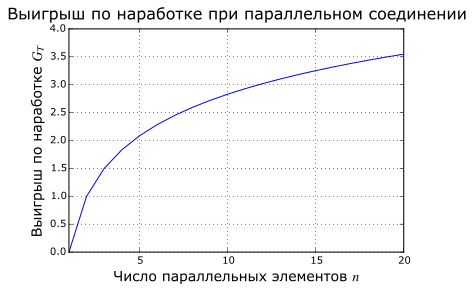

In [16]:
#Выигрыш по наработке до отказа в зависимости от числа параллельно соединенных элементов
nmax = 20
n = np.arange(1, nmax+1)

GT = np.zeros(len(n))
for j in range(nmax):
    GT[j] = sum([1/i for i in range(1, j+1)])

plt.plot(n, GT)
plt.xlim(xmin=1)
plt.xlabel('Число параллельных элементов $n$', fontsize=14)
plt.ylabel('Выигрыш по наработке $G_T$', fontsize=14)
plt.title('Выигрыш по наработке при параллельном соединении', fontsize=16, y=1.02)
plt.grid()